Bayesian Network Structure:
True


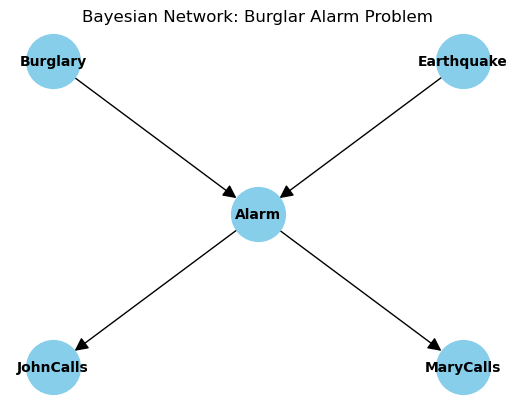

  0%|          | 0/9999 [00:00<?, ?it/s]


Approximate probabilities of Burglary:
Burglary
0    0.9988
1    0.0012
Name: proportion, dtype: float64


In [5]:
# !pip install pgmpy networkx matplotlib

from pgmpy.models import DiscreteBayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.sampling import GibbsSampling
import networkx as nx
import matplotlib.pyplot as plt

# Define the Bayesian Network structure
alarm_model = DiscreteBayesianNetwork([
    ("Burglary", "Alarm"),
    ("Earthquake", "Alarm"),
    ("Alarm", "JohnCalls"),
    ("Alarm", "MaryCalls"),
])

# Define CPDs
cpd_burglary = TabularCPD("Burglary", 2, [[0.999], [0.001]])
cpd_earthquake = TabularCPD("Earthquake", 2, [[0.998], [0.002]])
cpd_alarm = TabularCPD(
    "Alarm", 2,
    [[0.999, 0.71, 0.06, 0.05],
     [0.001, 0.29, 0.94, 0.95]],
    evidence=["Burglary", "Earthquake"],
    evidence_card=[2, 2]
)
cpd_johncalls = TabularCPD(
    "JohnCalls", 2,
    [[0.95, 0.1],
     [0.05, 0.9]],
    evidence=["Alarm"],
    evidence_card=[2]
)
cpd_marycalls = TabularCPD(
    "MaryCalls", 2,
    [[0.1, 0.7],
     [0.9, 0.3]],
    evidence=["Alarm"],
    evidence_card=[2]
)

# Add CPDs to the model
alarm_model.add_cpds(cpd_burglary, cpd_earthquake, cpd_alarm, cpd_johncalls, cpd_marycalls)

# Verify the model
print("Bayesian Network Structure:")
print(alarm_model.check_model())

# Draw the graph (fixed for new matplotlib)
G = nx.DiGraph()
nodes = ["Burglary", "Earthquake", "Alarm", "JohnCalls", "MaryCalls"]
edges = [
    ("Burglary", "Alarm"),
    ("Earthquake", "Alarm"),
    ("Alarm", "JohnCalls"),
    ("Alarm", "MaryCalls"),
]
G.add_nodes_from(nodes)
G.add_edges_from(edges)

pos = {
    "Burglary": (0, 0),
    "Earthquake": (2, 0),
    "Alarm": (1, -2),
    "JohnCalls": (0, -4),
    "MaryCalls": (2, -4),
}

fig, ax = plt.subplots()
nx.draw_networkx(
    G,
    pos=pos,
    ax=ax,
    with_labels=True,
    node_size=1500,
    node_color="skyblue",
    font_size=10,
    font_weight="bold",
    arrowsize=20
)
plt.title("Bayesian Network: Burglar Alarm Problem")
plt.axis("off")
plt.show()

# Gibbs Sampling
gibbssampler = GibbsSampling(alarm_model)
num_samples = 10000
samples = gibbssampler.sample(size=num_samples)

query_variable = "Burglary"
query_result = samples[query_variable].value_counts(normalize=True)
print(f"\nApproximate probabilities of {query_variable}:")
print(query_result)
